### *Este archivo se ejecuto en google colab si lo ejecutas en local debes eliminar las primeras 2 celdas*


In [ ]:
#subir archivos a colab
from google.colab import files
uploaded = files.upload()


Saving dataset_vibe_profesional.csv to dataset_vibe_profesional.csv


In [ ]:
#Instalamos sdv
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.5/198.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer

# 1. Cargar tus datos semilla (los 50 por carrera que generamos antes)
real_data = pd.read_csv('dataset_vibe_profesional.csv')

print(f"Datos originales cargados: {len(real_data)} filas.")

# 2. Detectar la estructura (Metadata)
# SDV necesita saber qué columnas son categóricas y cuáles numéricas.
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)

print("\n--- Estructura detectada por SDV ---")
# Esto es para que veas cómo SDV entiende tus preguntas
print(metadata.to_dict())

# 3. Entrenar el Sintetizador
# Usamos GaussianCopulaSynthesizer porque es rápido y excelente para
# detectar correlaciones en respuestas de opción múltiple (categóricas).
print("\nEntrenando el modelo (aprendiendo patrones)...")
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

# 4. Generar nuevos datos sintéticos
CANTIDAD_A_GENERAR = 2000
synthetic_data = synthesizer.sample(num_rows=CANTIDAD_A_GENERAR)

print(f"\n¡Datos generados! {len(synthetic_data)} nuevas filas.")

# 5. Guardar el nuevo Dataset Robusto
synthetic_data.to_csv('dataset_vibe_SDV_robusto.csv', index=False)

print("Archivo 'dataset_vibe_SDV_robusto.csv' guardado exitosamente.")

# --- REVISIÓN DE CALIDAD ---
# SDV tiene una herramienta para decirte qué tan parecidos son los datos nuevos a los viejos
from sdv.evaluation.single_table import evaluate_quality

print("\nEvaluando la calidad de los datos sintéticos (0 a 100%)...")
quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

# Un puntaje arriba de 80% es excelente.
# Significa que estadísticamente son "indistinguibles" pero no son copias exactas.

Datos originales cargados: 400 filas.

--- Estructura detectada por SDV ---
{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1', 'columns': {'P01': {'sdtype': 'categorical'}, 'P02': {'sdtype': 'categorical'}, 'P03': {'sdtype': 'categorical'}, 'P04': {'sdtype': 'categorical'}, 'P05': {'sdtype': 'categorical'}, 'P06': {'sdtype': 'categorical'}, 'P07': {'sdtype': 'categorical'}, 'P08': {'sdtype': 'categorical'}, 'P09': {'sdtype': 'categorical'}, 'P10': {'sdtype': 'categorical'}, 'P11': {'sdtype': 'categorical'}, 'P12': {'sdtype': 'categorical'}, 'P13': {'sdtype': 'categorical'}, 'P14': {'sdtype': 'categorical'}, 'P15': {'sdtype': 'categorical'}, 'P16': {'sdtype': 'categorical'}, 'P17': {'sdtype': 'categorical'}, 'P18': {'sdtype': 'categorical'}, 'P19': {'sdtype': 'categorical'}, 'P20': {'sdtype': 'categorical'}, 'Carrera_Target': {'sdtype': 'categorical'}, 'Satisfaccion': {'sdtype': 'categorical'}}}

Entrenando el modelo (aprendiendo patrones)...


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(



¡Datos generados! 2000 nuevas filas.
Archivo 'dataset_vibe_SDV_robusto.csv' guardado exitosamente.

Evaluando la calidad de los datos sintéticos (0 a 100%)...
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 22/22 [00:00<00:00, 621.36it/s]|
Column Shapes Score: 97.42%

(2/2) Evaluating Column Pair Trends: |██████████| 231/231 [00:01<00:00, 176.65it/s]|
Column Pair Trends Score: 71.13%

Overall Score (Average): 84.27%



# Unimos ambos dataset

In [ ]:
import pandas as pd

# 1. Cargar tus dos archivos
datos_reales = pd.read_csv('dataset_vibe_profesional.csv') # Tus ~1600 originales del script anterior
datos_sinteticos = pd.read_csv('dataset_vibe_SDV_robusto.csv') # Los 2000 nuevos de SDV

# (Opcional) Agregar una columna para saber cuál es cuál por si acaso
datos_reales['Tipo_Dato'] = 'Real'
datos_sinteticos['Tipo_Dato'] = 'Sintetico'

# 2. Concatenar (Pegar uno debajo del otro)
dataset_final = pd.concat([datos_reales, datos_sinteticos], ignore_index=True)

# 3. Guardar el Dataset Maestro
dataset_final.to_csv('DATASET_MAESTRO_ENTRENAMIENTO.csv', index=False)

print(f"¡Fusión completada!")
print(f"Total de filas para entrenar: {len(dataset_final)}")

¡Fusión completada!
Total de filas para entrenar: 2400


#Graficos

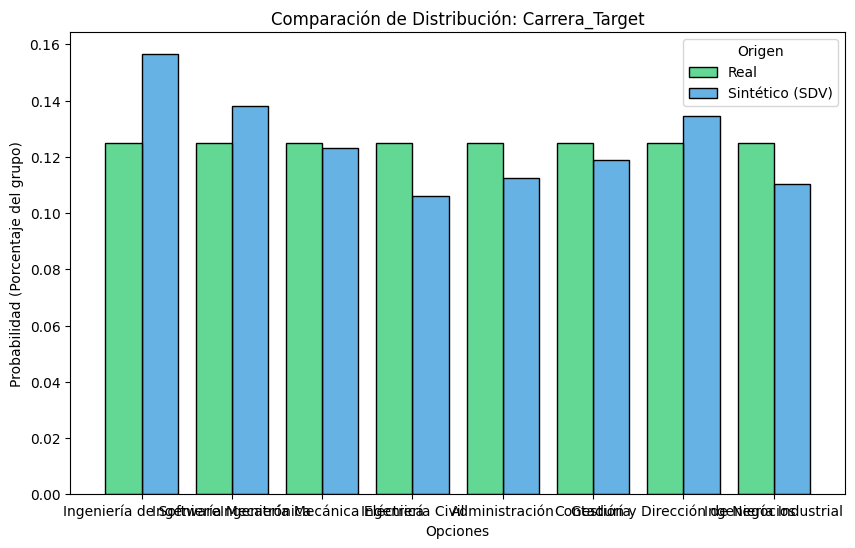

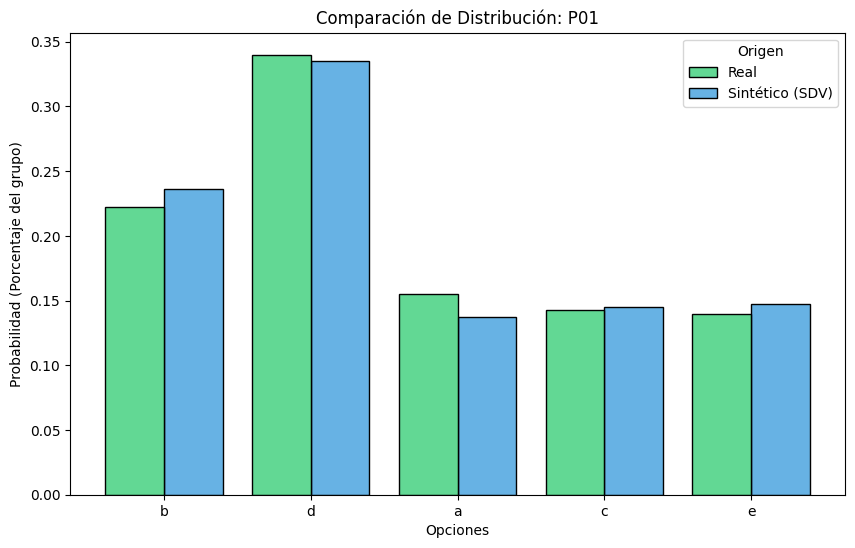

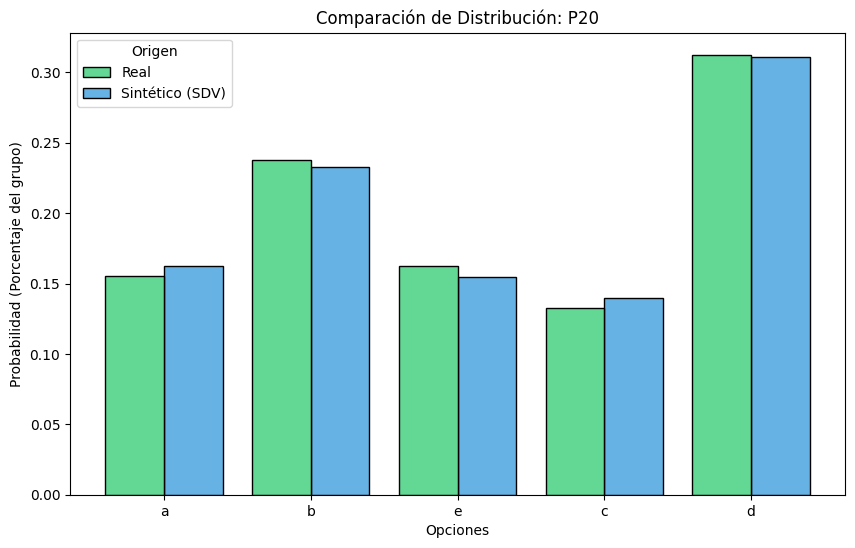

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar tus datasets
df_real = pd.read_csv('dataset_vibe_profesional.csv')
df_sintetico = pd.read_csv('dataset_vibe_SDV_robusto.csv')

# 2. Etiquetarlos para poder diferenciarlos en el gráfico
df_real['Origen'] = 'Real'
df_sintetico['Origen'] = 'Sintético (SDV)'

# 3. Unirlos en un solo DataFrame temporal
df_comparacion = pd.concat([df_real, df_sintetico])

# --- FUNCIÓN PARA GRAFICAR ---
def graficar_comparacion(columna):
    plt.figure(figsize=(10, 6))

    sns.histplot(
        data=df_comparacion,
        x=columna,
        hue='Origen',
        multiple='dodge',
        stat='probability', # Cambiamos a probabilidad (0 a 1)
        common_norm=False,  # <--- ¡ESTA ES LA CLAVE!
        shrink=0.8,
        palette={'Real': '#2ecc71', 'Sintético (SDV)': '#3498db'}
    )

    plt.title(f'Comparación de Distribución: {columna}')
    plt.ylabel('Probabilidad (Porcentaje del grupo)')
    plt.xlabel('Opciones')
    plt.show()

# --- PROBAR CON ALGUNAS COLUMNAS ---

# 1. Ver si respetó la proporción de Carreras
graficar_comparacion('Carrera_Target')

# 2. Ver si respetó los patrones de una pregunta clave (ej. P01 - Tiempo libre)
graficar_comparacion('P01')

# 3. Ver una de las preguntas numéricas/ordinales (ej. P20 - Gusto mates)
graficar_comparacion('P20')